# Introduction to Python Image Analysis package - scikit-image

*Importing Images, Measuring dimensions, other basics*

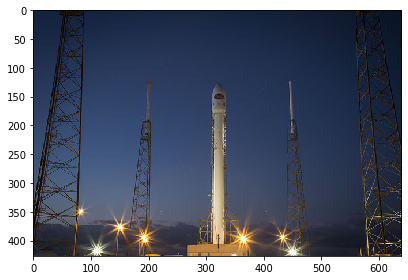

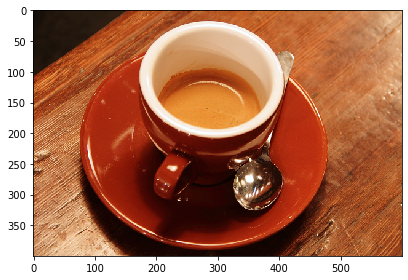

In [2]:
#import packages; the io module manages import/output operations; matplotlib is a plotting library
from skimage import data, io
from matplotlib import pyplot as plt

# import test/demo images from skimage data 
rocket_image = data.rocket()
io.imshow(rocket_image)
plt.show()

coffee_image = data.coffee()
io.imshow(coffee_image)
plt.show()

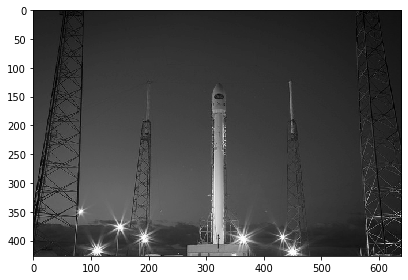

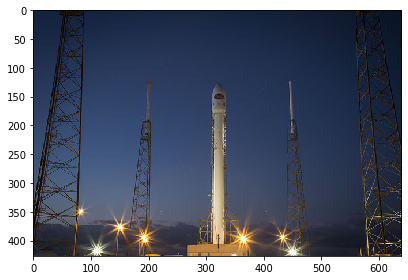

In [3]:
#converting rgb to grayscale - works for 8 bit images
from skimage import color
grayscale_rocket_image = color.rgb2gray(rocket_image)
io.imshow(grayscale_rocket_image)
plt.show()

#original image is unmodified
io.imshow(rocket_image)
plt.show()

In [4]:
#assessing image dimensions. A 2D image shape has '3' in the end if its a color image (RGB) signifying 3 channels.
import numpy as np
np.shape (rocket_image)

(427, 640, 3)

In [5]:
# A grayscale image would have just 2 numbers describing shape H x W
np.shape(grayscale_rocket_image)

(427, 640)

(1562, 1126, 3)

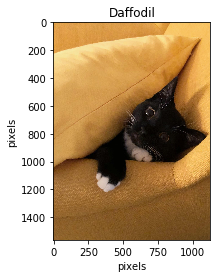

In [6]:
#Importing your own images - loading images with matplotlib
import matplotlib.image as mpimg
cat_image = mpimg.imread('Daffy.jpg')
plt.imshow(cat_image)
plt.title('Daffodil')
plt.xlabel('pixels')
plt.ylabel('pixels')
np.shape(cat_image)

In [7]:
type(cat_image)

numpy.ndarray

In [8]:
np.size(cat_image) #total number of pixels

5276436

Text(0.5, 1.0, 'Horizontal Flipped Image')

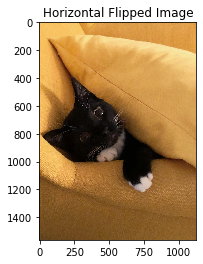

In [9]:
# Rotating or flipping images - vertical
verticalflip_cat_image = np.flipud(cat_image)
plt.imshow(verticalflip_cat_image)
plt.title ('Vertical Flipped Image')

# Rotating or flipping images - horizontal
horizontalflip_cat_image = np.fliplr(cat_image)
plt.imshow(horizontalflip_cat_image)
plt.title ('Horizontal Flipped Image')

In [10]:
#converting a 16 bit image to an 8 bit image # Not working - need to explore further
#import scipy
#from scipy.misc import bytescale
#cat_image_8bit = bytescale(cat_image)

# *Visualizing Images - show_image Function*

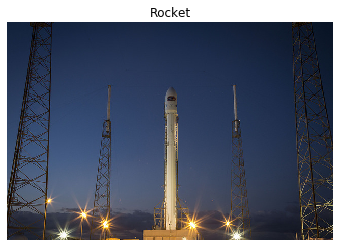

In [38]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show
show_image(rocket_image, 'Rocket')

# *Image Histograms*

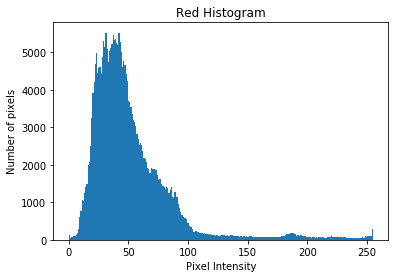

In [14]:
# Image histograms show number of pixels of each intensity value. For an 8 bit grayscale image '0' is pure black 
# and '255' is pure white. Histograms are an important tool in image pre-processing and analysis with applications
# such as thresholding, adjusting brightness and contrast, and equalizing an image
# slicing an image into separate RGB channels using matplotlib. 
# hist() to display the 256 different intensities of the a color channel (R or G or B)
# And ravel() to make these color values an array of one flat dimension.
red_rocket_image = rocket_image[:,:,0]
plt.hist(red_rocket_image.ravel(), bins=256)
plt.title('Red Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of pixels')
plt.show()

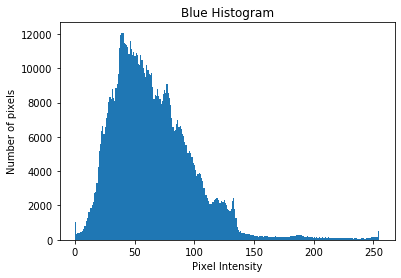

In [15]:
blue_rocket_image = rocket_image[:,:,2]
plt.hist(rocket_image.ravel(), bins=256)
plt.title('Blue Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of pixels')
plt.show()

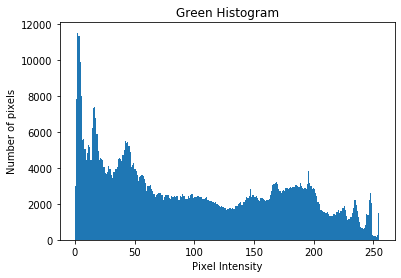

In [16]:
green_coffee_image = coffee_image[:,:,1]
plt.hist(coffee_image.ravel(), bins=256)
plt.title('Green Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of pixels')
plt.show()

# Thresholding

*Thresholding is partitioning an image into foreground and background by making it black and white. We do so by setting each pixel to: 255 (white) if pixel > threhold value
and 0 (black) if pixel < threhold value. Works best for high contrast images and is the simplest form of image segmentation. Color images will need to be converted into separate grayscale images for each channel before applying thresholding*

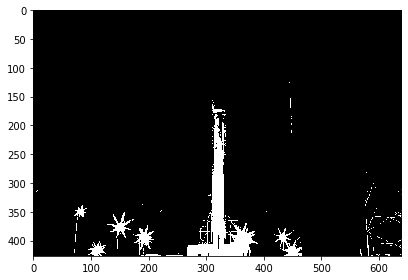

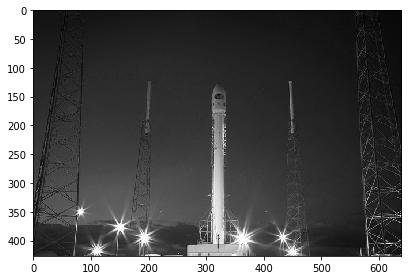

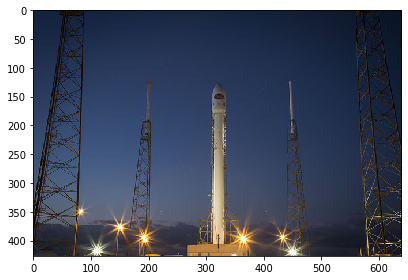

In [17]:
# Example of thresholding in python
# Choose an optimal threshold value. Here 127 selected for example
thresh = 127
# Apply thresholding to the image
binary_rocket = red_rocket_image > thresh
# Show the original and thresholded images
io.imshow(binary_rocket)
plt.show()
io.imshow(red_rocket_image)
plt.show()
io.imshow(rocket_image)
plt.show()

*There are two main types of thresholding in python*

(1) Global or histogram-based - works well for images with a relatively consistent background. Faster.

(2) Local or adaptive - works better for images with varying or inconsistent background. Slower.

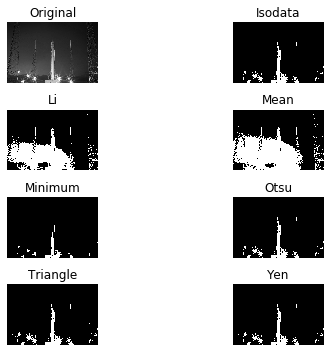

In [18]:
# Scikit-image includes several algorithms for both global thresholding.
# Helpful to try and compare results across them.
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(red_rocket_image, verbose=False)

*What is verbose?*
Verbose is a general programming term for produce lots of logging output. You can think of it as asking the program to "tell me everything about what you are doing all the time". Setting it to false can reduce run time.

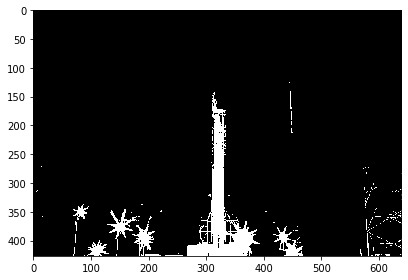

In [19]:
#GLOBAL THRESHOLDING: Obtaining optimal threshold value.

#Import the otsu threshold function
from skimage.filters import threshold_otsu

#Obtain the optimal threshold value
thresh = threshold_otsu(red_rocket_image)
binary_rocket = red_rocket_image > thresh
io.imshow(binary_rocket)
plt.show()

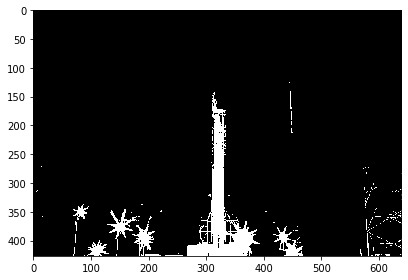

In [20]:
#LOCAL THRESHOLDING
from skimage.filters import threshold_local
block_size = 35
local_thresh = threshold_local(red_rocket_image, block_size, offset=10)
binary_rocket_local = red_rocket_image > local_thresh
io.imshow(binary_rocket)
plt.show()

# *Filters, Contrast, Morphology, and Transformation*
*Filtering - a mathematical function that is applied to an image to enhance or remove features. E.g., Smoothening, Sharpening, and edge detection. Filtering is a neighborhood or block operation*

# *Filtering Technique 1: Edge Detection*
*i.e., finding boundaries of objects in images by detecting discontinuities in intensity.*

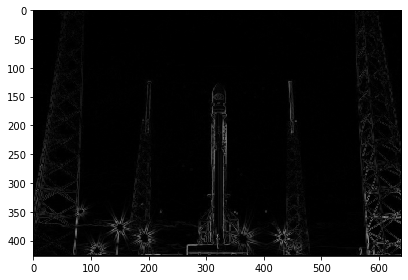

In [21]:
# Sobel method for edge detection in 2D images
# Import module and function
from skimage.filters import sobel
# Apply edge detection filter
edge_sobel = sobel(red_rocket_image)
io.imshow(edge_sobel)
plt.show()

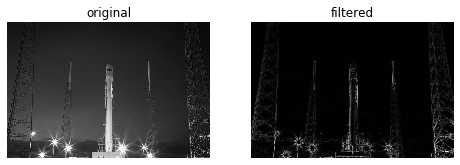

In [22]:
# Show original and filtered image for comparison using matplotlib subplots function #Python cares about indentations and tabs
# when defining functions.
import matplotlib.pyplot as plt
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True) 
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title('filtered')
    ax2.axis('off')
plot_comparison(red_rocket_image, edge_sobel, "Edge with Sobel")

# *Filtering technique 2: Gaussian smoothing*

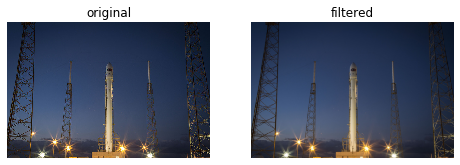

In [23]:
# A Gaussian filter can be used to reduce noise in an image. It causes image blurring and loss of contrast.
# Import the module and function
from skimage.filters import gaussian
# Apply edge detection filter
gaussian_image = gaussian(rocket_image, multichannel=True)
plot_comparison(rocket_image, gaussian_image, 'Blurred with Gaussian filter')

# *Adjusting contrast*
*Contrast is a measure of the dynamic range of an image.* We will learn histogram equalization and contrast enhancement methods. 3 types of histogram equalization methods: (1) Histogram equaliztion (2) Adaptive histogram equalization (3) Contrast Limited Adaptive Histogram Equalization.

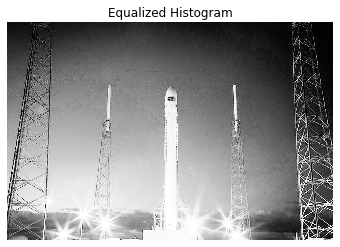

In [25]:
# Conventional Global Histogram equalization
from skimage import exposure
# Obtained the equalized image
image_eq = exposure.equalize_hist(red_rocket_image)
show_image(image_eq, 'Equalized Histogram')

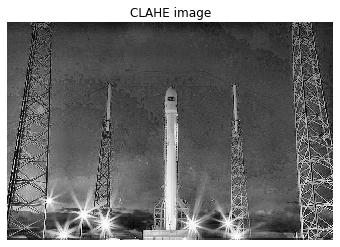

In [27]:
# Adaptive Equalization - generates multiple histograms for different parts of the image.
# Contrastive Limited Adaptive Histogram Equalization (CLAHE)
# CLAHE in scikit-image
from skimage import exposure
image_adapteq = exposure.equalize_adapthist(red_rocket_image, clip_limit=0.03)
show_image(image_adapteq, 'CLAHE image')

In [36]:
# Histogram max and min intensity values
import numpy as np
np.max(red_rocket_image)

255